# Your First Neural Network

🎯 Goals of this challenge:
- Writing the architecture of a Neural Network
- Inspect some of the most important hyperparameters of a Neural Network

🌗 In this challenge, we will be working with the **moons dataset**. 
* Your goal is to build a Neural Network which separates two classes. 
* Each data point $X$ has two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or the class 1
* These bi-dimensional points can be represented on a 2D-scatterplot, using colors to represent to two available classes $\color{blue}{blue}$ and $\color{red}{red} $
* Here is an example of such a moon dataset:

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/moons_dataset.png" />

## (1)  Generating the Moons dataset

📚 Here, we will use the Scikit-Learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. 

👉 Each moon corresponds to a class.

In [20]:
from sklearn.datasets import make_moons

### Generating the moons dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)

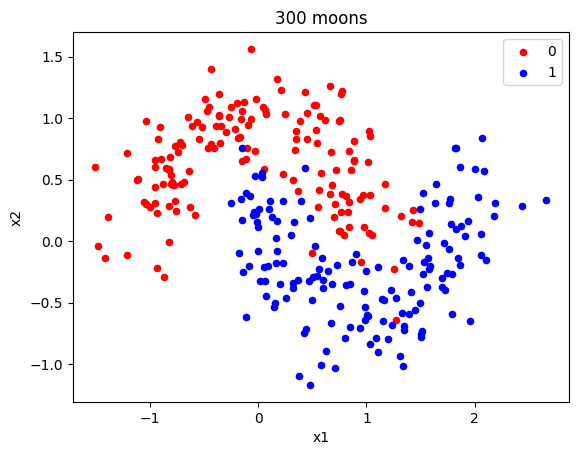

In [21]:
### This function allows to plot the two moons

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_moons(X, y):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
        
    
    plt.title(f"{len(X)} moons")
    plt.show()

plot_moons(X, y)

❓  Play with the number of samples and the noise to discover the effects on the `moons dataset` ❓

🎨 Plot the moons for different values.

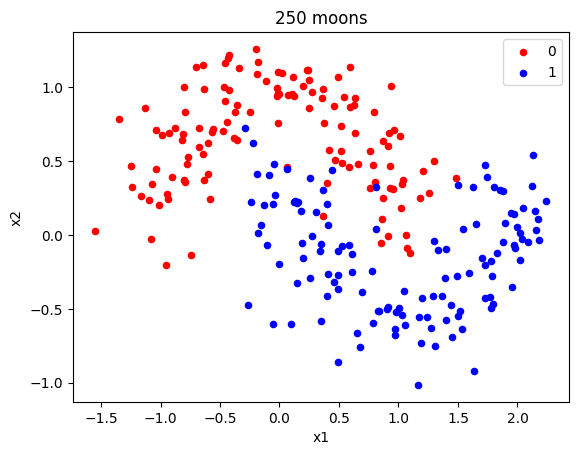

In [22]:
X, y = make_moons(n_samples=250, noise=0.20, random_state=0)

def plot_moons(X, y):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
        
    
    plt.title(f"{len(X)} moons")
    plt.show()

plot_moons(X, y)

❓ Create 250 samples of the data with ❓
* a noise equal to 0.20
* a random state equal to 0 to get the same results every time you re-run the notebook
* and split the initial dataset into a train and test set (size: 70/30%) 

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [23]:
from sklearn.model_selection import train_test_split

# Generate the moons dataset with 250 samples, noise=0.20, and random_state=0
X, y = make_moons(n_samples=250, noise=0.20, random_state=0)

# Split the dataset into a train and test set (70/30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

## (2) Designing a basic Neural Network  for a binary classification task

🧠 You will now define your first neural network.
The architecture of your model should have: 
- a first layer with:
    - 5 neurons
    - a _relu_ activation function 
    - the correct input dimension
- an output layer suited to your binary classification task.


❓ Complete the next function with the previous architecture ❓

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    #############################    
    
    model = Sequential()
    model.add(Dense(5, input_shape=(2,), activation='relu')) # First layer with 5 neurons, ReLU activation, and correct input dimension
    model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model()

---

<details>
    <summary><i>Intuitions about the optimization method</i></summary>

We'll keep this message short as you have a full course 📆 **Deep Learning - Optimizers, Loss, Fitting** coming soon.
    
So, briefly speaking:
    
- the ***.compile()*** tells your algorithm how to optimize the weights of your network when fitting the network on real data
    - the ***binary_crossentropy*** is the "log-loss" that you have already seen in Machine Learning in the context of a Logistic Regression for classification
    - To date, the ***adam*** optimizer is the gold standard in Deep Learning - an optimizer in Deep Learning is like a solver in Machine Learning: it provides an iterative method to minimize the loss function of an algorithm with respect to its parameters
    
</details>

---



❓ How many parameters does the model have?  ❓

<details>
    <summary><i>Hint</i></summary>

The `.summary()`method displays:
   - the stack of layers of your Neural Network
   - the output shape after each layer
   - the number of parameters for each layer (and consequently the total number of parameters)
    
</details>


In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 15        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


## (3) Training your Neural Network

❓You are now ready to train your algorithm. 

Let's go! Initialize your model and fit it on the training set using `100 epochs`! 

Store the results of the training into a `history` variable. ❓

In [27]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 1s 2ms/step - loss: 0.6044 - accuracy: 0.5486
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6005 - accuracy: 0.5429
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5964 - accuracy: 0.5543
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.5926 - accuracy: 0.5657
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.5891 - accuracy: 0.5600
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5855 - accuracy: 0.5600
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.5822 - accuracy: 0.5543
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 0.5788 - accuracy: 0.5600
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.5600
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 0.5723 - accuracy: 0.5657
Epoch 11/100
6/6 [===========

6/6 [==============================] - 0s 3ms/step - loss: 0.4444 - accuracy: 0.8343
Epoch 85/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4434 - accuracy: 0.8343
Epoch 86/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4425 - accuracy: 0.8343
Epoch 87/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4415 - accuracy: 0.8343
Epoch 88/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4405 - accuracy: 0.8343
Epoch 89/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4395 - accuracy: 0.8343
Epoch 90/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4387 - accuracy: 0.8343
Epoch 91/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4377 - accuracy: 0.8400
Epoch 92/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4367 - accuracy: 0.8400
Epoch 93/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4358 - accuracy: 0.8400
Epoch 94/100
6/6 [===============

👀 `history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will notice that you have access to epoch-by-epoch information stored in `history.history`

In [28]:
history.history

{'loss': [0.6044073700904846,
  0.6004533171653748,
  0.5964136719703674,
  0.5925735235214233,
  0.5890972018241882,
  0.5855419635772705,
  0.58222895860672,
  0.5787899494171143,
  0.5755562782287598,
  0.5722837448120117,
  0.5691171288490295,
  0.565995454788208,
  0.5627473592758179,
  0.5598450899124146,
  0.5569455623626709,
  0.5541728734970093,
  0.5513885617256165,
  0.5487598776817322,
  0.5461298227310181,
  0.5434263944625854,
  0.5411580801010132,
  0.5385552644729614,
  0.5362138152122498,
  0.5338982939720154,
  0.5316500663757324,
  0.5293132662773132,
  0.5271113514900208,
  0.524992823600769,
  0.5227620005607605,
  0.5206509828567505,
  0.5187239050865173,
  0.5166553258895874,
  0.514605700969696,
  0.5127972364425659,
  0.5107012987136841,
  0.5088872909545898,
  0.5070961713790894,
  0.5052720308303833,
  0.5035144090652466,
  0.5017890334129333,
  0.5002422332763672,
  0.4985838234424591,
  0.49697449803352356,
  0.49535179138183594,
  0.49382883310317993,
  0.

❓ Plot the history of the train loss using the following function ❓

In [29]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

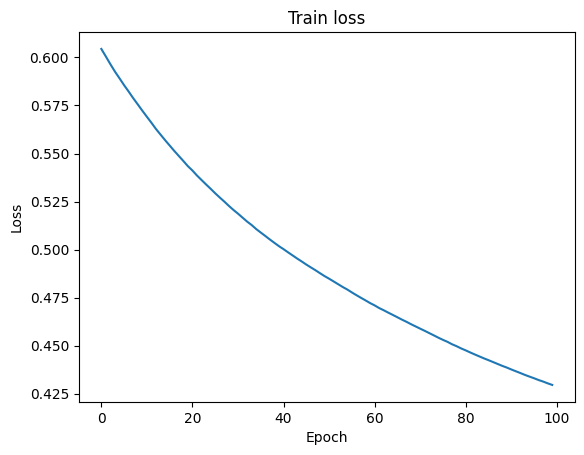

In [30]:
plot_history(history)

❓ What do you observe ❓

Train loss reduces over number of epochs

❗️ <u>Evaluation on unseen data</u> ❗️

🧑🏻‍🏫 A Deep Learning Model is like any other Machine Learning model. Once you've trained it on the training set and are satisfied with how the Neural Network was able to learn, you need to ask: can it be generalized to unseen data such as the test set? 



## (4) Predict & Evaluate performance on test set

❓ Predict the classes of the elements in the training set using _.predict()_ and store these predicted classes into a variable called `y_pred` ❓

In [31]:
# Using the model to predict the test set
y_pred_prob = model.predict(X_test)

# Converting probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype('int32')

3/3 [==============================] - 0s 2ms/step


❓ What are your _loss_ and your _accuracy_ on the test set ❓ 

💡 In other words, you are asked to evaluate your Deep Learning model!

In [32]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

# Print the results
print(f"Loss on the test set: {test_loss}")
print(f"Accuracy on the test set: {test_accuracy}")

3/3 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.8400
Loss on the test set: 0.4048693776130676
Accuracy on the test set: 0.7599999904632568


**🧪 Test your code**

In [33]:
from nbresult import ChallengeResult
result = ChallengeResult('first_model', accuracy=accuracy)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/data-your-first-neural-network/tests
plugins: dash-2.14.1, asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_first_model.py::TestFirstModel::test_accuracy PASSED                [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/first_model.pickle

git commit -m 'Completed first_model step'

git push origin master



❓ Check the accuracy of your predictions visually by using our `plot_decision_regions` available in `utils/plots.py` ❓

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    """Plot the 2D-decision region of a classifier with matplotlib along its first two dimensions X[:,0] and X[:,1].

    Args:
        X (np.Array): (n,p) dataset to classify
        y (np.Array): (n,) array of labels. Works well up to 5 unique labels.
        classifier: fitted classifier with `.predict()` method 
        test_idx (int, optional):  Index of test datapoints within X to display with a larger mark style. Defaults to None.
        resolution (float, optional): Resolution of the meshgrid used to colorize regions. Defaults to 0.02.
    """

    # setup marker generator and color map up for up to 5 classes
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    marker='x', label=cl)

    # Plot test samples if they exist
    if not test_idx is None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        for idx, cl in enumerate(np.unique(y_test)):
            plt.scatter(x=X_test[y_test == cl, 0], y=X_test[y_test == cl, 1],
                        alpha=1, color=cmap(idx),
                        linewidths=1, marker='o', s=55, label=f'test {cl}')
    plt.legend()


😥 It looks like we are **underfitting** a bit, right? 

😁 We can try :
- to train the model a bit longer...
- ...or maybe to create a Deeper Neural network in the next section!

## (5) Training your Neural Network with more epochs

❓ Re-train the model for 500 iterations ❓
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learned on the previous _.fit()_ ...!)
- Plot the history to see how the loss changed over the different epochs/iterations.

Epoch 1/500
6/6 [==============================] - 1s 2ms/step - loss: 0.8509 - accuracy: 0.5600
Epoch 2/500
6/6 [==============================] - 0s 4ms/step - loss: 0.8415 - accuracy: 0.5600
Epoch 3/500
6/6 [==============================] - 0s 2ms/step - loss: 0.8333 - accuracy: 0.5600
Epoch 4/500
6/6 [==============================] - 0s 10ms/step - loss: 0.8240 - accuracy: 0.5600
Epoch 5/500
6/6 [==============================] - 0s 4ms/step - loss: 0.8158 - accuracy: 0.5657
Epoch 6/500
6/6 [==============================] - 0s 3ms/step - loss: 0.8079 - accuracy: 0.5657
Epoch 7/500
6/6 [==============================] - 0s 5ms/step - loss: 0.8000 - accuracy: 0.5657
Epoch 8/500
6/6 [==============================] - 0s 4ms/step - loss: 0.7929 - accuracy: 0.5600
Epoch 9/500
6/6 [==============================] - 0s 3ms/step - loss: 0.7851 - accuracy: 0.5657
Epoch 10/500
6/6 [==============================] - 0s 4ms/step - loss: 0.7784 - accuracy: 0.5600
Epoch 11/500
6/6 [==========

6/6 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 0.8114
Epoch 85/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4959 - accuracy: 0.8114
Epoch 86/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4940 - accuracy: 0.8114
Epoch 87/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.8171
Epoch 88/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4903 - accuracy: 0.8171
Epoch 89/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4885 - accuracy: 0.8229
Epoch 90/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4866 - accuracy: 0.8229
Epoch 91/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4849 - accuracy: 0.8229
Epoch 92/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4831 - accuracy: 0.8286
Epoch 93/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4815 - accuracy: 0.8286
Epoch 94/500
6/6 [===============

6/6 [==============================] - 0s 3ms/step - loss: 0.4051 - accuracy: 0.8400
Epoch 168/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.8400
Epoch 169/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4037 - accuracy: 0.8400
Epoch 170/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8457
Epoch 171/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8457
Epoch 172/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8457
Epoch 173/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4009 - accuracy: 0.8457
Epoch 174/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4002 - accuracy: 0.8457
Epoch 175/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8514
Epoch 176/500
6/6 [==============================] - 0s 3ms/step - loss: 0.3988 - accuracy: 0.8514
Epoch 177/500
6/6 [=====

6/6 [==============================] - 0s 2ms/step - loss: 0.3536 - accuracy: 0.8571
Epoch 250/500
6/6 [==============================] - 0s 3ms/step - loss: 0.3531 - accuracy: 0.8571
Epoch 251/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.8571
Epoch 252/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3519 - accuracy: 0.8571
Epoch 253/500
6/6 [==============================] - 0s 3ms/step - loss: 0.3514 - accuracy: 0.8571
Epoch 254/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.8571
Epoch 255/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.8571
Epoch 256/500
6/6 [==============================] - 0s 3ms/step - loss: 0.3496 - accuracy: 0.8571
Epoch 257/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.8571
Epoch 258/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3485 - accuracy: 0.8571
Epoch 259/500
6/6 [=====

6/6 [==============================] - 0s 3ms/step - loss: 0.3153 - accuracy: 0.8686
Epoch 332/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.8686
Epoch 333/500
6/6 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.8686
Epoch 334/500
6/6 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.8686
Epoch 335/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.8743
Epoch 336/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8743
Epoch 337/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8743
Epoch 338/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8743
Epoch 339/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.8743
Epoch 340/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.8743
Epoch 341/500
6/6 [=====

6/6 [==============================] - 0s 2ms/step - loss: 0.2888 - accuracy: 0.8800
Epoch 414/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2886 - accuracy: 0.8800
Epoch 415/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2883 - accuracy: 0.8800
Epoch 416/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2881 - accuracy: 0.8800
Epoch 417/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.8800
Epoch 418/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2876 - accuracy: 0.8800
Epoch 419/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2873 - accuracy: 0.8800
Epoch 420/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2871 - accuracy: 0.8800
Epoch 421/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2869 - accuracy: 0.8800
Epoch 422/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2866 - accuracy: 0.8800
Epoch 423/500
6/6 [=====

6/6 [==============================] - 0s 2ms/step - loss: 0.2718 - accuracy: 0.8971
Epoch 496/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2715 - accuracy: 0.8971
Epoch 497/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2714 - accuracy: 0.8971
Epoch 498/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2711 - accuracy: 0.8971
Epoch 499/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2710 - accuracy: 0.8971
Epoch 500/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2708 - accuracy: 0.8971


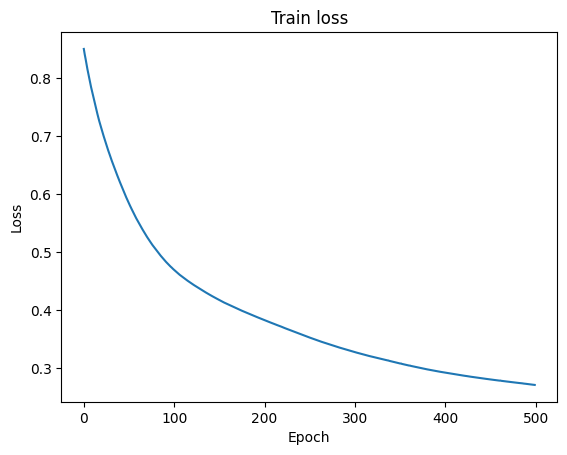

In [53]:
# Re-initialize the model
model = initialize_model()

# Re-train the model for 500 epochs
new_history = model.fit(X_train, y_train, epochs=500)

# Plot the training history
plot_history(new_history)

❓ Did the test accuracy improve? ❓

In [54]:
# YOUR CODE HERE

<details>
    <summary><i>Not really... explanations here</i></summary>

* The accuracy did not increase by training the model with more epochs...
* So when should have we stopped the training of this Deep Learning Model?
    * Answer in the next chapter <b><i>Deep Learning - Optimizers, Loss and Fitting</i></b>
    
</details>

## (6) A Deeper Deep Learning Model

❓ Let's try a **deeper** architecture that includes the following layers:

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suitable for this problem ❓


In [55]:
def initialize_model_2():
    
    #############################
    #  1 - Model architecture   #
    #############################   
    
    model.add(Dense(20, activation='relu', input_shape=(2,)))
    
    # Second layer with 10 neurons
    model.add(Dense(10, activation='relu'))
    
    # Third layer with 5 neurons
    model.add(Dense(5, activation='relu'))

    # Output layer suitable for binary classification
    model.add(Dense(1, activation='sigmoid'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model_2()

❓ What is the number of parameters of your new model ❓

In [56]:
332

332

❓ Run your model on the previous dataset for 500 epochs and plot the loss afterwards ❓

Epoch 1/500
6/6 [==============================] - 2s 4ms/step - loss: 0.6939 - accuracy: 0.4914
Epoch 2/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4914
Epoch 3/500
6/6 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.4914
Epoch 4/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4914
Epoch 5/500
6/6 [==============================] - 0s 8ms/step - loss: 0.6928 - accuracy: 0.4914
Epoch 6/500
6/6 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5714
Epoch 7/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.6571
Epoch 8/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.4914
Epoch 9/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.4914
Epoch 10/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.4914
Epoch 11/500
6/6 [===========

6/6 [==============================] - 0s 3ms/step - loss: 0.3991 - accuracy: 0.9029
Epoch 85/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3973 - accuracy: 0.9029
Epoch 86/500
6/6 [==============================] - 0s 3ms/step - loss: 0.3967 - accuracy: 0.9086
Epoch 87/500
6/6 [==============================] - 0s 3ms/step - loss: 0.3951 - accuracy: 0.9029
Epoch 88/500
6/6 [==============================] - 0s 3ms/step - loss: 0.3936 - accuracy: 0.9029
Epoch 89/500
6/6 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.9029
Epoch 90/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.9086
Epoch 91/500
6/6 [==============================] - 0s 3ms/step - loss: 0.3919 - accuracy: 0.9086
Epoch 92/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3879 - accuracy: 0.9086
Epoch 93/500
6/6 [==============================] - 0s 3ms/step - loss: 0.3891 - accuracy: 0.9029
Epoch 94/500
6/6 [===============

6/6 [==============================] - 0s 3ms/step - loss: 0.2729 - accuracy: 0.9314
Epoch 168/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2710 - accuracy: 0.9314
Epoch 169/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2692 - accuracy: 0.9371
Epoch 170/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2683 - accuracy: 0.9371
Epoch 171/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2648 - accuracy: 0.9314
Epoch 172/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2631 - accuracy: 0.9371
Epoch 173/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2621 - accuracy: 0.9371
Epoch 174/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2594 - accuracy: 0.9371
Epoch 175/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2578 - accuracy: 0.9371
Epoch 176/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2544 - accuracy: 0.9371
Epoch 177/500
6/6 [=====

6/6 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9829
Epoch 250/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9714
Epoch 251/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0596 - accuracy: 0.9829
Epoch 252/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9829
Epoch 253/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9771
Epoch 254/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0503 - accuracy: 0.9886
Epoch 255/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0481 - accuracy: 0.9829
Epoch 256/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0499 - accuracy: 0.9714
Epoch 257/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0502 - accuracy: 0.9829
Epoch 258/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9886
Epoch 259/500
6/6 [=====

6/6 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9829
Epoch 332/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0410 - accuracy: 0.9829
Epoch 333/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9714
Epoch 334/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 0.9943
Epoch 335/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0421 - accuracy: 0.9886
Epoch 336/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9714
Epoch 337/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9829
Epoch 338/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 0.9943
Epoch 339/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9943
Epoch 340/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9771
Epoch 341/500
6/6 [=====

6/6 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.9714
Epoch 414/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0406 - accuracy: 0.9829
Epoch 415/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9943
Epoch 416/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0398 - accuracy: 0.9771
Epoch 417/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9714
Epoch 418/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.9886
Epoch 419/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0429 - accuracy: 0.9943
Epoch 420/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0375 - accuracy: 0.9829
Epoch 421/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9829
Epoch 422/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.9829
Epoch 423/500
6/6 [=====

6/6 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.9771
Epoch 496/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9886
Epoch 497/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.9943
Epoch 498/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9771
Epoch 499/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9829
Epoch 500/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0403 - accuracy: 0.9943


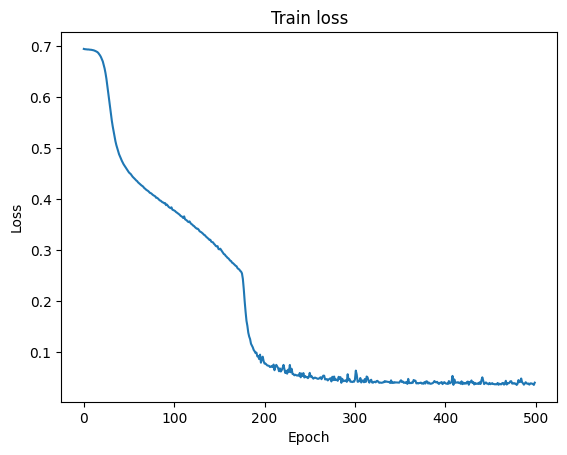

In [57]:
# Initialize the deeper model
model = initialize_model_2()

# Train the model for 500 epochs
deeper_history = model.fit(X_train, y_train, epochs=500)

# Plot the training history
plot_history(deeper_history)

❓ What is your accuracy on the test test ? Store it as `accuracy_deep` variable (`float`) ❓

In [58]:
# Evaluate the model on the test set
test_loss_deep, accuracy_deep = model.evaluate(X_test, y_test)

# Print the accuracy
print(f"Accuracy on the test set: {accuracy_deep}")

# Store the accuracy as a float
accuracy_deep = float(accuracy_deep)

3/3 [==============================] - 0s 4ms/step - loss: 0.3349 - accuracy: 0.9333
Accuracy on the test set: 0.9333333373069763


🧪 **Test your code**

In [59]:
from nbresult import ChallengeResult
result = ChallengeResult('deeper_model',
                         accuracy=accuracy_deep)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/data-your-first-neural-network/tests
plugins: dash-2.14.1, asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_deeper_model.py::TestDeeperModel::test_accuracy PASSED              [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/deeper_model.pickle

git commit -m 'Completed deeper_model step'

git push origin master



❓ Do you think we are overfitting on the noise ❓ Once again, use the `plot_decision_regions` function to help your intuition.

In [ ]:
# YOUR CODE HERE

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!